# Projet DVF

### Import et chargement des données

In [53]:
#!pip install Django==4.2
import pandas as pd
from datetime import datetime
import numpy as np

valeursfoncieres_2022=pd.read_csv("valeursfoncieres-2022.txt", sep="|")
#valeursfoncieres_2021=pd.read_csv("valeursfoncieres-2021.txt", sep="|")
#valeursfoncieres_2020=pd.read_csv("valeursfoncieres-2020.txt", sep="|")
#valeursfoncieres_2019=pd.read_csv("valeursfoncieres-2019.txt", sep="|")
#valeursfoncieres_2018=pd.read_csv("valeursfoncieres-2018.txt", sep="|")


#Pour lire http://www.groupe-dvf.fr/fiche-n4-qualite-et-exhaustivite-des-donnees-dvf/

C:\Users\marcv\AppData\Local\Temp\ipykernel_22088\1604235011.py:6: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  valeursfoncieres_2022=pd.read_csv("valeursfoncieres-2022.txt", sep="|")


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les données pour une ville spécifique
ville = 'Nom de la ville'
ville_data = valeursfoncieres_2022[valeursfoncieres_2022['Commune'] == ville]

if len(ville_data) > 0:
    # Calculer le prix moyen du mètre carré pour chaque département dans la ville
    dept_prices = ville_data.groupby('Code departement')['Valeur fonciere'].mean()

    # Création du graphique en barres
    dept_prices.plot(kind='bar')

    # Ajout des labels et titre
    plt.xlabel('Département')
    plt.ylabel('Prix moyen du mètre carré')
    plt.title(f"Comparaison des prix moyens du mètre carré dans les départements de {ville}")

    # Affichage du graphique
    plt.show()




In [55]:
valeursfoncieres_2022 = valeursfoncieres_2022.dropna(axis=1, how='all') #Supprime les colonnes vide
valeursfoncieres_2022["Date mutation"] = pd.to_datetime(valeursfoncieres_2022["Date mutation"].str.strip(), format="%d/%m/%Y")#Convertit Date mutation en datetime 


valeursfoncieres_2022["Valeur fonciere"] = valeursfoncieres_2022["Valeur fonciere"].astype(str).str.replace(",",".")
valeursfoncieres_2022["Valeur fonciere"] = valeursfoncieres_2022["Valeur fonciere"].replace("nan", np.nan)
valeursfoncieres_2022["Valeur fonciere"] = pd.to_numeric(valeursfoncieres_2022["Valeur fonciere"])


#print(valeursfoncieres_2022.dtypes)

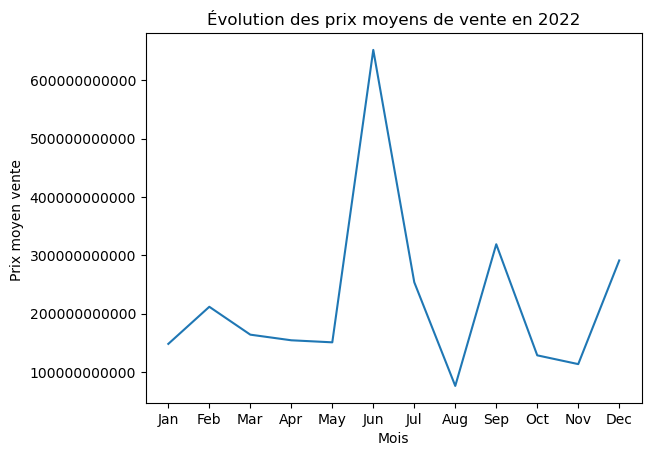

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

valeursfoncieres_2022['Date mutation'] = pd.to_datetime(valeursfoncieres_2022['Date mutation'])

valeursfoncieres_2022_filtrer = valeursfoncieres_2022[valeursfoncieres_2022['Date mutation'].dt.year == 2022]
monthly_prices = valeursfoncieres_2022.groupby(valeursfoncieres_2022['Date mutation'].dt.month)['Valeur fonciere'].sum()
plt.plot(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en entiers
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des mois
months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_prices.index, months)

# Ajout des labels et titre
plt.xlabel('Mois')
plt.ylabel('Prix moyen vente ')
plt.title("Évolution des prix moyens de vente en 2022")

# Affichage du graphique
plt.show()


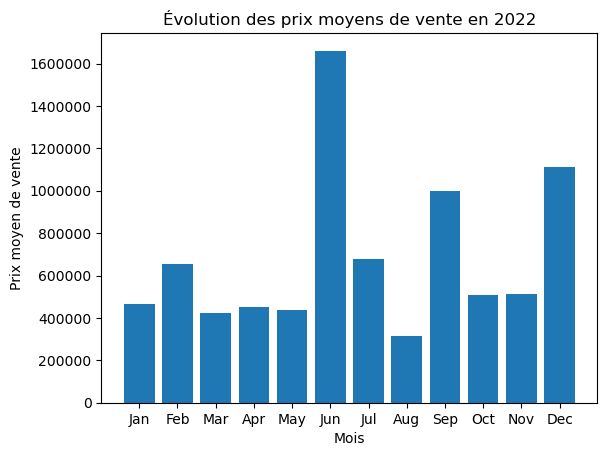

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

valeursfoncieres_2022['Date mutation'] = pd.to_datetime(valeursfoncieres_2022['Date mutation'])

valeursfoncieres_2022_filtrer = valeursfoncieres_2022[valeursfoncieres_2022['Date mutation'].dt.year == 2022]
monthly_prices = valeursfoncieres_2022.groupby(valeursfoncieres_2022['Date mutation'].dt.month)['Valeur fonciere'].mean()

# Créer un diagramme en bâtons
plt.bar(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en entiers
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des mois
months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_prices.index, months)

# Ajout des labels et titre
plt.xlabel('Mois')
plt.ylabel('Prix moyen de vente')
plt.title("Évolution des prix moyens de vente en 2022")

# Affichage du diagramme en bâtons
plt.show()


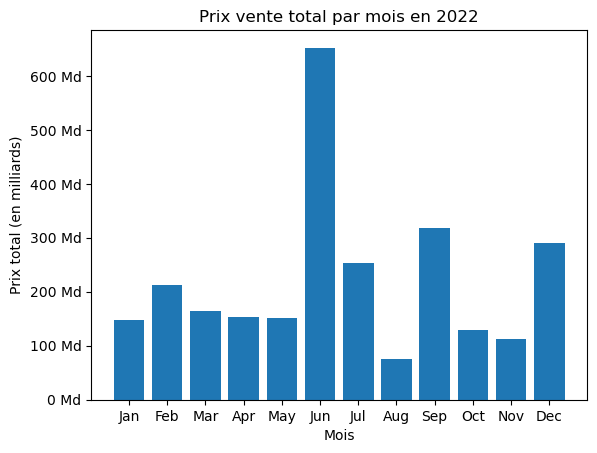

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

valeursfoncieres_2022['Date mutation'] = pd.to_datetime(valeursfoncieres_2022['Date mutation'])

valeursfoncieres_2022_filtrer = valeursfoncieres_2022[valeursfoncieres_2022['Date mutation'].dt.year == 2022]
monthly_prices = valeursfoncieres_2022.groupby(valeursfoncieres_2022['Date mutation'].dt.month)['Valeur fonciere'].sum()

# Diviser les valeurs par 1 milliard pour mettre en milliards
monthly_prices = monthly_prices / 1e9

# Créer un diagramme en bâtons
plt.bar(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en milliards
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f} Md'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des mois
months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_prices.index, months)

# Ajout des labels et titre
plt.xlabel('Mois')
plt.ylabel('Prix total (en milliards)')
plt.title("Prix vente total par mois en 2022")

# Affichage du diagramme en bâtons
plt.show()


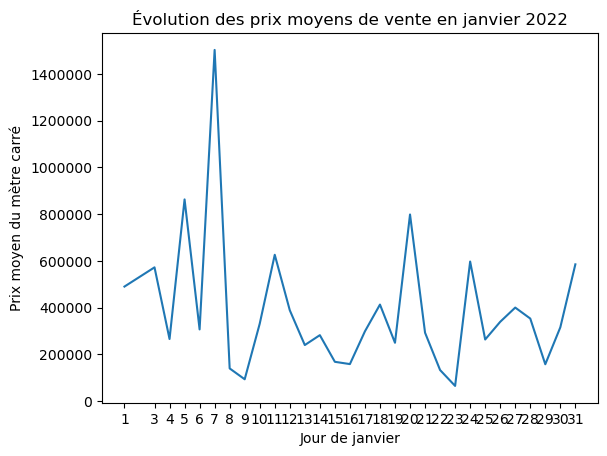

In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

valeursfoncieres_2022['Date mutation'] = pd.to_datetime(valeursfoncieres_2022['Date mutation'])

valeursfoncieres_janvier = valeursfoncieres_2022[valeursfoncieres_2022['Date mutation'].dt.month == 1]
monthly_prices = valeursfoncieres_janvier.groupby(valeursfoncieres_janvier['Date mutation'].dt.day)['Valeur fonciere'].mean()
plt.plot(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en entiers
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des jours
days = [str(day) for day in monthly_prices.index]
plt.xticks(monthly_prices.index, days)

# Ajout des labels et titre
plt.xlabel('Jour de janvier')
plt.ylabel('Prix moyen du mètre carré')
plt.title("Évolution des prix moyens de vente en janvier 2022")

# Affichage du graphique
plt.show()

In [60]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import geopandas as gpd
import folium

# Charger les données à partir du fichier CSV
valeursfoncieres_2022 = pd.read_csv("valeursfoncieres-2022.txt", sep="|")

# Filtrer les données pour Paris
paris_data = valeursfoncieres_2022[valeursfoncieres_2022['Commune'] == 'PARIS']

# Charger les données géographiques des quartiers ou arrondissements de Paris
quartiers_paris = gpd.read_file('arrondissements.geojson')

# Fusionner les données des prix moyens du mètre carré avec les données géographiques des quartiers de Paris
quartiers_merged = quartiers_paris.merge(paris_data.groupby('Code postal')['Valeur fonciere'].mean(), left_on=any, right_index=True)

# Créer une carte interactive
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les données des prix moyens du mètre carré à la carte
folium.Choropleth(
    geo_data=quartiers_merged,
    name='Prix moyen du mètre carré',
    data=quartiers_merged,
    columns=['code', 'Valeur fonciere'],
    key_on='feature.properties.code',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Prix moyen du mètre carré'
).add_to(m)

# Afficher la carte interactive
m





ModuleNotFoundError: No module named 'geopandas'

In [ ]:
!pip install plotly;
import plotly.express as px

df = px.data.election()
df = df.melt(id_vars="district", value_vars=["Coderre", "Bergeron", "Joly"],
            var_name="candidate", value_name="votes")

# Load the arrondissements GeoJSON file
with open("C:/Users/enzoy/Documents/GitHub/Projet-DVF/arrondissements.geojson") as file:
    geojson = file.read()

fig = px.choropleth(df, geojson=geojson, color="votes", facet_col="candidate",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# valeur par type de voie
valeursfoncieres_2022['Valeur fonciere'] = pd.to_numeric(valeursfoncieres_2022['Valeur fonciere'], errors='coerce')
valeursfoncieres_2022['Surface terrain'] = pd.to_numeric(valeursfoncieres_2022['Surface terrain'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.boxplot(x= valeursfoncieres_2022['Type de voie'], y= valeursfoncieres_2022['Valeur fonciere'])
plt.xlabel('Type de voie')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière par type de voie')
plt.xticks(rotation=45)
plt.show()
#valeur par région pas encore de variable region créer 
plt.figure(figsize=(12, 6))
sns.histplot(data=valeursfoncieres_2022, x='Valeur fonciere', hue='Type de voie')
plt.xlabel('Valeur foncière')
plt.ylabel('Fréquence')
plt.title('Histogramme de la valeur foncière par type de voie')
plt.legend(title='Région')
plt.show()
#surface par région 
plt.figure(figsize=(12, 6))
sns.boxplot(data=valeursfoncieres_2022, x='Type de voie', y='Surface terrain')
plt.xlabel('Type de voie')
plt.ylabel('Surface terrain')
plt.title('Boxplot de la surface terrain par type de voie')
plt.xticks(rotation=45)
plt.show()








In [ ]:
import seaborn as sns
valeursfoncieres_2022['Valeur fonciere'] = pd.to_numeric(valeursfoncieres_2022['Valeur fonciere'], errors='coerce')
valeursfoncieres_2022['Surface terrain'] = pd.to_numeric(valeursfoncieres_2022['Surface terrain'], errors='coerce')

valeursfoncieres_2022= valeursfoncieres_2022.dropna(subset=["Valeur fonciere"])
#prix moyen par ville

plt.figure(figsize=(12, 6))

mean_prices_by_city = valeursfoncieres_2022.groupby('Commune')['Valeur fonciere'].mean().sort_values(ascending=False)
print(mean_prices_by_city)
sns.barplot(x=mean_prices_by_city.index, y=mean_prices_by_city.values)
plt.xlabel('Ville')
plt.ylabel('Prix moyen')
plt.title('Prix moyen des biens immobiliers par ville')
plt.xticks(rotation=45)
plt.show()
#prix moyen par départements 
plt.figure(figsize=(12, 6))
mean_prices_by_dept = valeursfoncieres_2022.groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False)
print(mean_prices_by_dept)
sns.barplot(x=mean_prices_by_dept.index, y=mean_prices_by_dept.values)
plt.xlabel('Département')
plt.ylabel('Prix moyen')
plt.title('Prix moyen des biens immobiliers par département')
plt.xticks(rotation=45)
#plt.show()
#prix moyen par région
plt.figure(figsize=(12, 6))
mean_prices_by_region = valeursfoncieres_2022.groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False)
print(mean_prices_by_region)
#sns.barplot(x=mean_prices_by_region.index, y=mean_prices_by_region.values)
plt.xlabel('Région')
plt.ylabel('Prix moyen')
plt.title('Prix moyen des biens immobiliers par région')
plt.xticks(rotation=45)
#plt.show()
#prix moyen à Paris
paris_data = valeursfoncieres_2022[valeursfoncieres_2022['Commune'] == 'Paris']
mean_price_paris = paris_data['Valeur fonciere'].mean()
print(mean_price_paris)
plt.figure(figsize=(8, 6))
plt.bar('Paris', mean_price_paris)
plt.xlabel('Ville')
plt.ylabel('Prix moyen')
plt.title('Prix moyen des biens immobiliers à Paris')
#plt.show()

- Une bonne analyse de données (chargement,nettoyage, interprétation, combinaison,
etc)



- Au minimum une vingtaine d'interprétations et visualisations pertinentes autour d'une
année (en particulier 2022 ) prix moyen du mètre carré d'un département d'une ville,
comparaison entre différents type, appart, maison, geomap, différence entre ville,
départements, régions,...
- Au minimum 5 interprétations et visualisations pertinentes en comparaison avec au
moins une autre année (en particulier avant covid)

In [ ]:
ValDeMarne = valeursfoncieres_2022.loc[valeursfoncieres_2022["Code departement"] == 94]

#ValDeMarne = ValDeMarne.loc[(ValDeMarne["Surface reelle bati"]!=0 | ValDeMarne["Surface reelle bati"]!=np.nan)]
ValDeMarne = ValDeMarne[(ValDeMarne["Surface reelle bati"]!=0)]
ValDeMarne = ValDeMarne.dropna(subset=["Surface reelle bati"])
#ValDeMArne = ValDeMarne.dropna(subset=["Surface reelle bati"])

ValDeMarne['sort_val'] = ValDeMarne["Valeur fonciere"] / ValDeMarne["Surface reelle bati"]
ValDeMarne =  ValDeMarne.sort_values('sort_val')

tfile = open('test.txt', 'w')
tfile.write(ValDeMarne.to_string())
tfile.close()


prixM_2_VDM = ValDeMarne["Valeur fonciere"].sum()/ValDeMarne["Surface reelle bati"].sum()
print(prixM_2_VDM)

Paris = valeursfoncieres_2022.loc[valeursfoncieres_2022["Code departement"] == 75]

#ValDeMarne = ValDeMarne.loc[(ValDeMarne["Surface reelle bati"]!=0 | ValDeMarne["Surface reelle bati"]!=np.nan)]
Paris = Paris[(Paris["Surface reelle bati"]!=0)]
Paris = Paris.dropna(subset=["Surface reelle bati"])
#ValDeMArne = ValDeMarne.dropna(subset=["Surface reelle bati"])

Paris['sort_val'] = Paris["Valeur fonciere"] / Paris["Surface reelle bati"]
Paris =  Paris.sort_values('sort_val')

tfile = open('test.txt', 'w')
tfile.write(Paris.to_string())
tfile.close()

prixM_2_Paris = Paris["Valeur fonciere"].sum()/Paris["Surface reelle bati"].sum()
print(prixM_2_Paris)

HautsDeSeine = valeursfoncieres_2022.loc[valeursfoncieres_2022["Code departement"] == 92]

#ValDeMarne = ValDeMarne.loc[(ValDeMarne["Surface reelle bati"]!=0 | ValDeMarne["Surface reelle bati"]!=np.nan)]
HautsDeSeine = HautsDeSeine[(HautsDeSeine["Surface reelle bati"]!=0)]
HautsDeSeine = HautsDeSeine.dropna(subset=["Surface reelle bati"])
#ValDeMArne = ValDeMarne.dropna(subset=["Surface reelle bati"])

HautsDeSeine['sort_val'] = HautsDeSeine["Valeur fonciere"] / HautsDeSeine["Surface reelle bati"]
HautsDeSeine =  HautsDeSeine.sort_values('sort_val')

tfile = open('test.txt', 'w')
tfile.write(Paris.to_string())
tfile.close()

prixM_2_HautsDeSeine = HautsDeSeine["Valeur fonciere"].sum()/HautsDeSeine["Surface reelle bati"].sum()
print(prixM_2_HautsDeSeine)

prix_m2 = [prixM_2_VDM, prixM_2_Paris,prixM_2_HautsDeSeine]
Departement = ['Val-de-Marne', 'Paris','Hauts-De-Seine']

plt.bar(Departement, prix_m2)
plt.title('Comparaison des prix au mètre carré entre le Val-de-Marne, Paris, Hauts-de_Seine')
plt.xlabel('Départements')
plt.ylabel('Prix au mètre carré')
plt.show()

C:\Users\marcv\AppData\Local\Temp\ipykernel_22088\2747508556.py:16: RuntimeWarning: invalid value encountered in double_scalars
  prixM_2_Lyon = Lyon["Valeur fonciere"].sum()/Lyon["Surface reelle bati"].sum()


nan
Series([], dtype: float64)
55210.08027940167


C:\Users\marcv\AppData\Local\Temp\ipykernel_22088\2747508556.py:45: RuntimeWarning: invalid value encountered in double_scalars
  prixM_2_Levallois = Levallois["Valeur fonciere"].sum()/Levallois["Surface reelle bati"].sum()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

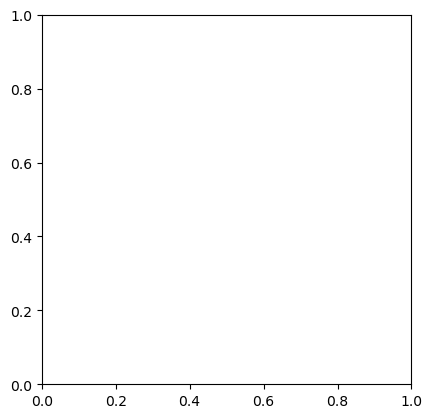

In [70]:
valeursfoncieres_2022['Valeur fonciere'] = pd.to_numeric(valeursfoncieres_2022['Valeur fonciere'], errors='coerce')

Lyon = valeursfoncieres_2022.loc[valeursfoncieres_2022["Commune"] == 'Lyon']
Lyon = Lyon[(Lyon["Surface reelle bati"]!=0)]
Lyon =Lyon.dropna(subset=["Surface reelle bati"])


Lyon['sort_val'] = Lyon["Valeur fonciere"] / Lyon["Surface reelle bati"]
Lyon =  Lyon.sort_values('sort_val')

tfile = open('test.txt', 'w')
tfile.write(Lyon.to_string())
tfile.close()


prixM_2_Lyon = Lyon["Valeur fonciere"].sum()/Lyon["Surface reelle bati"].sum()
print(prixM_2_Lyon)

Paris = valeursfoncieres_2022[valeursfoncieres_2022['Commune'] == 'PARIS']

Paris = Paris[(Paris["Surface reelle bati"]!=0)]
Paris = Paris.dropna(subset=["Surface reelle bati"])
Paris['sort_val'] = Paris["Valeur fonciere"] / Paris["Surface reelle bati"]
Paris =  Paris.sort_values('sort_val')

tfile = open('test.txt', 'w')
tfile.write(Paris.to_string())
tfile.close()

prixM_2_Paris = Paris.groupby('Commune')['Valeur fonciere'].mean() / Paris.groupby('Commune')['Surface reelle bati'].mean()
print(prixM_2_Paris)

Levallois= valeursfoncieres_2022.loc[valeursfoncieres_2022["Commune"] == 'Levallois']
Levallois = Levallois[(Levallois["Surface reelle bati"]!=0)]
Levallois = Levallois.dropna(subset=["Surface reelle bati"])


Levallois['sort_val'] = Levallois["Valeur fonciere"] / Levallois["Surface reelle bati"]
Levallois =  Levallois.sort_values('sort_val')

tfile = open('test.txt', 'w')
tfile.write(Levallois.to_string())
tfile.close()

prixM_2_Levallois = Levallois["Valeur fonciere"].sum()/Levallois["Surface reelle bati"].sum()
print(prixM_2_HautsDeSeine)



prix_m2 = [prixM_2_Lyon, prixM_2_Paris,prixM_2_Levallois]
Ville = ['Lyon', 'Paris','Levallois']

plt.pie(prix_m2, Ville)
plt.title('Comparaison des prix au mètre carré entre Lyon, Paris, Levallois')
plt.show()

In [68]:
levallois = valeursfoncieres_2022[valeursfoncieres_2022['Commune'] == 'LEVALLOIS PERRET']
levallois_prix_fonciere = levallois.groupby('Commune')['Valeur fonciere'].mean() / levallois.groupby('Commune')['Surface reelle bati'].mean()
Paris = valeursfoncieres_2022[valeursfoncieres_2022['Commune'] == 'PARIS']
Paris_prix_fonciere = Paris.groupby('Commune')['Valeur fonciere'].mean() / Paris.groupby('Commune')['Surface reelle bati'].mean()



In [ ]:
print(ValDeMarne["Valeur fonciere"])